# Overview

**THIS IS NOW IN THE LESSON. DO NOT CHANGE THIS  HERE, INSTEAD EDIT IT IN https://github.com/alex-konovalov/sage-lesson/blob/gh-pages/index.md FILE**

In this Software Carpentry module we will explore some of the functionalities of Sage, exemplified by exploring the mathematical underpinnings of icosahedral virus structure. 

Most viruses have an icosahedral protein capsid encapsulating and protecting the genome. The reasons for this are essentially genetic: the nucleic acid (DNA or RNA) needed to encode a protein shell consisting of a single protein would be so large that it would not actually fit inside this protein shell. Thus the protein shell has to be assembled from one or several identical building blocks. The simplest way of assembling identical building blocks into a container is by using symmetry. This means the problem of virus structure is essentially geometric, rather than genetic/biochemical etc, and given by the regular solids. Those are the Platonic solids - we will also be interested in their reflection symmetry groups, and the related concepts of root systems which generate these reflection groups from a collection of vectors (so-called roots or root vectors), which define mirror planes at specific sets of angles to each other. 

To start with, we will perform several standard procedures such as defining vectors and matrices in Sage, and then perform multiplication of a vector by a matrix, which are very widely applicable. 

We then take a set of vectors as a starting point. Those vectors define mirror planes via the planes that these vectors are normal to. One can thus find a set of matrices that describe reflections in those mirror planes. We then define our first function: it takes a (root) vector as its argument and returns the matrix that describes the reflection in the hyperplane that it is normal to.

These matrices can be multiplied together to generate new matrices. We thus generate a growing list of such matrices by multiplying together more and more of these simple reflections. Python is very powerful for handling lists, and skillfully manipulating lists is thus a very general technique. 

The examples we will look at are such that these lists remain finite, i.e. at some point the continued multiplication of matrices stops generating something new. This is the idea of closure: the product of any two matrices in the complete list is contained somewhere in this list. We therefore want to define some new functions: checking whether a given matrix is equal to another; checking whether a given matrix is already contained in the list; and given some starting simple reflections/roots, to generate the whole list.

This list contains all the symmetry transformations of a Platonic solid, and is encapsulated in the mathematical notion of a group: for instance, the icosahedron has 120 different symmetry transformations, i.e. reflections, rotations etc, that leave the icosahedron invariant; these 120 group elements can all be generated by multiplying together three simple reflections given by 3 root vectors. 

So this example gives us a set of 120 matrices. We can pick up our earlier example on how these act on vectors. If we feed one vector to these 120 matrices we in general get a set of 120 vectors. This set of vectors can be visualised as a polyhedron in 3D.

We will generate several such polyhedra. We will see that when our seed vector lies on certain symmetry axes, then the cardinality (number of points) of this polyhedron will be lower than 120, since some of the points actually coincide (are degenerate). In this way, we will generate the icosahedron (12 vertices), the dodecahedron (20 vertices) and the icosidodecahedron (30 vertices). 

The 120 group elements correspond to various rotations, reflections etc of the polyhedra, that look identical afterwards. There is an identity operation, the 3x3 identity matrix, that leaves everything the same; every operation can be undone by the matrix inverse; we alluded to the fact that the set of matrices closes under matrix multiplication; technically, the final axiom of a group is also satisfied since matrix multiplication is associative. So we construct the list of inverses to our matrices. We also look at what kind of operation the 120 group elements are. E.g. the icosahedron consists of 20 triangles, i.e. each midpoint of a triangle is a centre of 3-fold symmetry: everything looks the same after rotation by 0, 120 or 240 degrees. Similarly, since five triangles meet in each vertex, such vertices are centres of 5-fold symmetry. That is, if one performs this operation five times, one gets back to the identity. We are therefore interested in the power of each of the 120 matrices that gives the identity matrix. This is called the order of each element. We also calculate the determinant (+1=rotation, -1=reflection etc) and the trace (character) of each element, as well as the sets of elements (x,y) that are pairwise conjugate to each other via $x=gyg^{-1}$ for some matrix g. The group theoretical motivation is not crucial here, it is an easy operation to perform, and illustrates a good use of lists with a nice algorithm. 

The functions that check equality of matrices, or whether a matrix is already contained in a given set, is usually straightforward for polyhedral symmetries with nice integer values etc. However, the fact that 5-fold symmetry arises in the context of the icosahedral group means that the golden ratio $\tau = 1/2(1+\sqrt(5))$ makes an appearance. This slight awkwardness can be dealt with in several different ways - e.g. using the recurrence relation $\tau^2=\tau+1$, or numerically, or symbolically - which we will explore. 

So a virus can build an icosahedral shell out of 20 triangular building blocks - or 60 kite-shaped building blocks with 3 assembling into an equilateral triangle. So genetically, the difficulty for viruses is to encode triangles, not how many to make. So there evolution comes up with something interesting! Rather than making each of the 20 icosahedral faces out of once such triangle, one can use more (say 4) to make larger icosahedra or smaller building blocks. This makes genetic and evolutionary sense for the virus. The number of small triangles per icosahedral face is called the (surprise!) triangulation number (or T-number for short). Not all such numbers are allowed - there is a general construction using a hexagonal lattice that constructs triangulations for T-numbers $T=h^2+hk+k^2$, where $h$ and $k$ are integers. We will also calculate some allowed T-numbers, as well as finding pairs of $h$ and $k$ that give rise to certain T-numbers such as 499. We display polytopes, such as the icosahedron, and a $T=4$ triangulation. We also construct the case of Human Papillomavirus, which has one of the 'forbidden' T-numbers, which required the invention of new mathematics to describe virus structure! 

Actually, some of the simpler viruses have evolved a very clever way of assembling, that depends on the RNA being there. It serves as a washing line, onto which the building blocks are successively pegged, growing an icosahedron, rather than letting it to assemble on its own. This leads to the mathematical idea of a Hamltonian path or cycle, that visits a certain set of vertices of a polyhedron exacly once. The polyhedra in question are a bit too complicated, but we can look at a simple toy model!



# Episode 1 - First session with SageMath

**THIS IS NOW IN THE LESSON. DO NOT CHANGE THIS EPISODE HERE, INSTEAD EDIT IT IN https://github.com/alex-konovalov/sage-lesson/blob/gh-pages/_episodes_ipynb/01-introduction.ipynb FILE**

In this episode, we demonstrate how to use SageMath for simple calculations in order to became familiar with the SageMath Jupyter interface.


You can use SageMath as a calculator:

In [1]:
1+1

2

Lists cab be entered as follows:

In [2]:
[[1,2], [3,4]]

[[1, 2], [3, 4]]

A list does not automatically become a matrix. This has to be specified explicitly:

In [3]:
m=matrix([[1,2], [3,4]])

In this case, we assigned the result to a _variable_ called `m`. Sage performs the command but does not display its result. If you want to inspect `m`, you need to do the following:

In [4]:
m

[1 2]
[3 4]

You can combine several commands in the same cell as well:

In [5]:
m=matrix([[1,2], [3,4]])
m

[1 2]
[3 4]

The fact that `m` is a matrix will allow to perform further operations (try to perform them with a list and you will get an error)

In [6]:
m^-1

[  -2    1]
[ 3/2 -1/2]

In [7]:
m*m^-1

[1 0]
[0 1]

But:

In [8]:
[[1,2], [3,4]]^-1

TypeError: unsupported operand type(s) for ** or pow(): 'list' and 'int'

Another common type of error is when one tries to use a variable name that does not exist in the current SageMath session will lead to an error:

In [9]:
y

NameError: name 'y' is not defined

SageMath is able to convert operands to a suitable type in many scenarios, for example

In [10]:
1/2+1.5

2.00000000000000

It also allows to _overload_ operations - for example, `+` may be use to add numbers and also to concatenate strings and lists:

In [11]:
"ab" + "c"

'abc'

In [12]:
[1,2]+[3,4]

[1, 2, 3, 4]

On the other hand, when operations is not possible, an error will happen, for example

In [13]:
"a" * "b"

TypeError: can't multiply sequence by non-int of type 'str'

Finally, SageMath also have graphical capabilities. An easy 2D graphics example is shown below. In the next episodes you will see 3D examples.

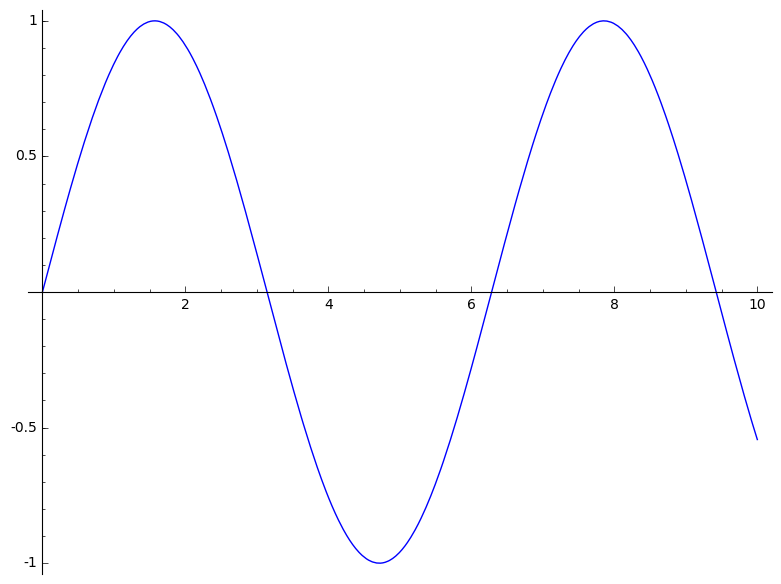

In [14]:
plot(sin, (0,10))

# Episode 2 - polynomials and linear algebra

**THIS IS NOW IN THE LESSON. DO NOT CHANGE THIS EPISODE HERE, INSTEAD EDIT IT IN https://github.com/alex-konovalov/sage-lesson/blob/gh-pages/_episodes_ipynb/02-multiply-matrix-and-vector.ipynb FILE**

Next we demonstrate indeterminates and polynomials.

This is an indeteminate `x`. It is defined automatically when SageMath starts (however, it is not read-only and may be easily overwritten):

In [15]:
x

x

One can construct polynomials amd fid their roots as follows:

In [16]:
f=x^2-x-1

In [17]:
f

x^2 - x - 1

In [18]:
solve([f==0],x)

[x == -1/2*sqrt(5) + 1/2, x == 1/2*sqrt(5) + 1/2]

Convert this these to a floating point variable:

In [19]:
float(1/2*sqrt(5) + 1/2)

1.618033988749895

Other symbolic variables are not defined. For example, if we try to define `v` to be the vector with symbolic coordinates `x`, `y`, `z`, we will have an error, because only `x` is defined by default when you launch Sage!

In [20]:
v = vector([x, y, z])

NameError: name 'y' is not defined

To fix this, we need to define `y` (and `z`) as symbolic variables, using `SR.var` (where "SR" stands for "symbolic ring"):

In [21]:
x, y, z = SR.var("x y z")

In [22]:
v = vector([x, y, z])
v

(x, y, z)

Such vectors can be operated with in the same way like vectors with numeric coordinates. To demonstrate this, we want to create an additive inverse of a 3x3 indentity matrix over integers. One could certainly enter it with `matrix([[-1,0,0], [0,-1,0], [0,0,-1]])`, but actually SageMath has a function `identity_matrix` that can be used instead. Below we demonstrate how to use SageMath help system to get its documentation:

In [23]:
identity_matrix?

Signature:      identity_matrix(ring, n=0, sparse=False)
Docstring:     
   This function is available as identity_matrix(...) and
   matrix.identity(...).

   Return the n x n identity matrix over the given ring.

   The default ring is the integers.

   EXAMPLES:

      sage: M = identity_matrix(QQ, 2); M
      [1 0]
      [0 1]
      sage: M.parent()
      Full MatrixSpace of 2 by 2 dense matrices over Rational Field
      sage: M = identity_matrix(2); M
      [1 0]
      [0 1]
      sage: M.parent()
      Full MatrixSpace of 2 by 2 dense matrices over Integer Ring
      sage: M.is_mutable()
      True
      sage: M = identity_matrix(3, sparse=True); M
      [1 0 0]
      [0 1 0]
      [0 0 1]
      sage: M.parent()
      Full MatrixSpace of 3 by 3 sparse matrices over Integer Ring
      sage: M.is_mutable()
      True
Init docstring: x.__init__(...) initializes x; see help(type(x)) for signature
File:           /ext/sage/sage-8.2_1604/local/lib/python2.7/site-packages/sage/matrix/s

Hence, we will define `A` using this special function.

In [24]:
A = -identity_matrix(3)
A

[-1  0  0]
[ 0 -1  0]
[ 0  0 -1]

Now we multiply this matrix and symbolic vector using `*`

In [25]:
A * v

(-x, -y, -z)

We can substitute values of variables as follows:

In [26]:
v.subs(x=1, y=0, z=3)

(1, 0, 3)

In [27]:
A * v.subs(x=1, y=0, z=3)

(-1, 0, -3)

In [28]:
A * v

(-x, -y, -z)

In [29]:
_.subs(x=1, y=0, z=3)

(-1, 0, -3)

In the cell above, the underscore `_` refers to the result of the last executed command, that is of `A*v`.

# Episode 3 - Elements of programming and 3D graphics

**NOW EDIT ONLY IN https://github.com/alex-konovalov/sage-lesson/blob/gh-pages/_episodes_ipynb/03-matrix-group.ipynb file**

The following is a list of points in 3D, that we wish to plot - they are actually the vertices of an icosahedron, $\tau$ is the golden ratio we had above $1/2(1+\sqrt{5})$

#TODO: question - could go to Hamiltonian cycles now?

In [30]:
tau = 1.619

icos_vertex_list = [[1,0,tau], [-1,0,tau], [1,0,-tau], [-1,0,-tau], [0, tau, 1], [0, tau, -1], [0, -tau, 1], [0, -tau, -1], [tau, 1, 0], [tau, -1, 0], [-tau, 1, 0], [-tau, -1, 0]]

point3d(icos_vertex_list, size=50)

" 
 width="100%"
 height="500"
 style="border: 0;">

For next step you need to use some programming language, as doing this interactively is not productive. First we need to introduce some notions, namely ranges, loops and conditional statements.

In [31]:
for n in range(1,6):
    print(n)

1
2
3
4
5


We now do a double loop over two variables with a non-trivial 'function'. This gives the 'allowed' triangulation numbers in Caspar-Klug theory. Note that we define this as a set, so that the order does not matter and duplicates do not occur. 

In [32]:
l=set([])
for h in range(0,6):
    for k in range(0,6):
        l.add(h^2+h*k+k^2)
l

{0, 1, 3, 4, 7, 9, 12, 13, 16, 19, 21, 25, 27, 28, 31, 37, 39, 48, 49, 61, 75}

Now let us loop over a larger range, and combine this with an if statement. We are generating large numbers of 'allowed' triangulation numbers. But say, we are only interested in finding potential $(h,k)$ pairs that give rise to the largest known triangulation in a virus, which for now (2018) is $499$ for Cafeteria roenbergensis virus (https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5511168/). 

In [33]:
for h in range(0,20):
    for k in range(h,20):
        t = h^2+h*k+k^2
        if t == 499:
            print(h, k)

(7, 18)


So there is a unique pair (up to chirality).

In the following example, we check that there is only one unordered 5-tuple of nonegative integers such that one of these integers is 1, and the sum of their squares is 60 (those familiar with group theory will recognise that this gives the dimensions of irreducible representations of the icosahedral group). This also uses a couple of nested for loops combined with  an if statement to show the uniquess of the solution 'by brute force'/enumeration. 

In [34]:
order = 60

for i1 in range(1,8):
    for i2 in range(i1,8):
        for i3 in range(i2,8):
             for i4 in range(i3,8):
                    if (1^2+i1^2+i2^2+i3^2+i4^2==order):
                        print(1, i1, i2, i3, i4)

(1, 3, 3, 4, 5)


Find the adjacencies of vertices. Which distances occur?

In [35]:
for i in range(0,1):
    for j in range(0,12):
        print(round(norm(vector(icos_vertex_list[i])-vector(icos_vertex_list[j])),2))

0.0
2.0
3.24
3.81
2.0
3.24
2.0
3.24
2.0
2.0
3.24
3.24


Find all those with distance (squared) 2

In [36]:
adj=[]
for i in range(0,len(icos_vertex_list)):
    adj.append([])
    for j in range(0,12):
        if round(norm(vector(icos_vertex_list[i])-vector(icos_vertex_list[j])),2)==2.00:
            adj[i].append(j)
    print(adj[i])

[1, 4, 6, 8, 9]
[0, 4, 6, 10, 11]
[3, 5, 7, 8, 9]
[2, 5, 7, 10, 11]
[0, 1, 5, 8, 10]
[2, 3, 4, 8, 10]
[0, 1, 7, 9, 11]
[2, 3, 6, 9, 11]
[0, 2, 4, 5, 9]
[0, 2, 6, 7, 8]
[1, 3, 4, 5, 11]
[1, 3, 6, 7, 10]


Getting the list of edges

In [37]:
icos_edges = []
for i in range(0,len(adj)):
    for j in range(0,len(adj[i])):
        icos_edges.append( line3d( [icos_vertex_list[i], icos_vertex_list[adj[i][j]]], thickness=10) )

In [38]:
vertices = point3d(icos_vertex_list, size=100)
icosahedron = vertices
for edge in icos_edges:
    icosahedron = icosahedron + edge

In [39]:
show(icosahedron)

" 
 width="100%"
 height="500"
 style="border: 0;">

# Episode 4: matrix groups: closure, order of an element etc

For our first matrix we defined, we now multiply it till we achieve closure (of the group).

Start with the matrix we have defined above as the first and only member of a list of matrices. Now multiply these together, see if we get something new, and keep going till we get closure.

That is take pairs of matrices g[i]*g[j], and see whether this is equal to something in the list g[k]. If not it is new, and we add it to the list.

In [40]:
gens = [-identity_matrix(3)]
elts = copy(gens)
new = copy(gens)

while true:
    new1 = [ ]
    for u in new:
        for v in gens:
            tmp = u * v
            if not tmp in elts:
                if not tmp in new1:
                    new1.append(tmp)
    if new1 == [ ]:
        break
    else:
        elts = elts+new1
        new = copy(new1)

In [41]:
elts

[
[-1  0  0]  [1 0 0]
[ 0 -1  0]  [0 1 0]
[ 0  0 -1], [0 0 1]
]

So our matrix squares to the identity. Generally, the power of a matrix that yields the identity is called the order of a matrix. Here the order is 2 for -I and 1 for I. 

It's time to show how to define own functions! For example, to calculate an order, and to get closure of a set of generating matrices.

In [42]:
def order_of_matrix(m):
    if m.ncols() != m.nrows():
        raise IndexError("The argument is not a square matrix.")
    id = identity_matrix(m.nrows())
    tmp = m
    count = 1
    while tmp != id:
        tmp = tmp*m
        tmp = tmp.apply_map(expand) #Pierre added this as well
        count += 1
    return count

In [43]:
order_of_matrix(-identity_matrix(3))

2

In [44]:
[order_of_matrix(m) for m in elts]

[2, 1]

Now do a slightly less trivial example: the three reflections in the coordinate planes: xy, yz, zx. Actually the count is given by the length of the list, so we can streamline that.

In [45]:
gens = [matrix([[-1,0,0], [0,1,0], [0,0,1]]), matrix([[1,0,0], [0,-1,0], [0,0,1]]), matrix([[1,0,0], [0,1,0], [0,0,-1]])]
elts = copy(gens)
new = copy(gens)

while true:
    new1 = [ ]
    for u in new:
        for v in gens:
            tmp = u * v
            if not tmp in elts:
                if not tmp in new1:
                    new1.append(tmp)
    if new1 == [ ]:
        break
    else:
        elts = elts+new1
        new = copy(new1)

In [46]:
elts

[
[-1  0  0]  [ 1  0  0]  [ 1  0  0]  [1 0 0]  [-1  0  0]  [-1  0  0]
[ 0  1  0]  [ 0 -1  0]  [ 0  1  0]  [0 1 0]  [ 0 -1  0]  [ 0  1  0]
[ 0  0  1], [ 0  0  1], [ 0  0 -1], [0 0 1], [ 0  0  1], [ 0  0 -1],

[ 1  0  0]  [-1  0  0]
[ 0 -1  0]  [ 0 -1  0]
[ 0  0 -1], [ 0  0 -1]
]

In [47]:
len(elts)

8

What is the order of each element? What are the inverses of each element? Of course, we could use matrix inverse, but that doesn't tell us which pairs in our list are inverse to each other. But if $g^n=I$ then $g^{n-1}$ is of course the inverse of $g$, called $g^{-1}$.

In [48]:
[order_of_matrix(m) for m in elts]

[2, 2, 2, 1, 2, 2, 2, 2]

We now formalise the idea of 'multiplying matrices together till we stop getting anything new'.

In [49]:
def closure_of_generators(gens):
    elts = copy(gens)
    new = copy(gens)

    while true:
        new1 = [ ]
        for u in new:
            for v in gens:
                tmp = u * v
                if not tmp in elts:
                    if not tmp in new1:
                        new1.append(tmp)
        if new1 == [ ]:
            break
        else:
            print(len(elts),len(new1))
            print('----------------')
            elts = elts+new1
            new = copy(new1)
    return elts

In [50]:
closure_of_generators([-identity_matrix(3)])

(1, 1)
----------------


[
[-1  0  0]  [1 0 0]
[ 0 -1  0]  [0 1 0]
[ 0  0 -1], [0 0 1]
]

In [51]:
closure_of_generators([matrix([[-1,0,0], [0,1,0], [0,0,1]]), matrix([[1,0,0], [0,-1,0], [0,0,1]]), matrix([[1,0,0], [0,1,0], [0,0,-1]])])

(3, 4)
----------------
(7, 1)
----------------


[
[-1  0  0]  [ 1  0  0]  [ 1  0  0]  [1 0 0]  [-1  0  0]  [-1  0  0]
[ 0  1  0]  [ 0 -1  0]  [ 0  1  0]  [0 1 0]  [ 0 -1  0]  [ 0  1  0]
[ 0  0  1], [ 0  0  1], [ 0  0 -1], [0 0 1], [ 0  0  1], [ 0  0 -1],

[ 1  0  0]  [-1  0  0]
[ 0 -1  0]  [ 0 -1  0]
[ 0  0 -1], [ 0  0 -1]
]

In order to do more general reflections and the symmetry groups they generate, we would like to take a normal vector and derive from that the matrix for a reflection in the (hyper)plane the vector is normal to. Then we use these as generating matrices and multiply them together till we achieve closure. 

# Episode 5: More general reflection groups 
Resolve a vector $x=x_{\perp}+x_{\parallel}$ with perpendicular and parallel components given relative to a normal vector $n$. The reflection in the hyperplane normal to $n$ will yield  $x'=x_{\perp}-x_{\parallel}=x-2x_{\parallel}=x-2\frac{(x.n)n}{n.n}$. For components  $x=(x_1, x_2, x_3)$ and $n=(n_1, n_2, n_3)$ find the 3x3 matrix corresponding to this reflection

In [52]:
def reflection_matrix(v, normalize=True, symbolic=False):
    """
    Return the reflection matrix to the plane with normal vector v
    
    INPUT:
    
      - ``v`` -- vector or any iterable that can be turned into a vector
      - ``normalize`` -- boolean (default: True)
      
    If ``normalize`` is ``False``, assume the vector is a unit vector and avoid normalizing.

    EXAMPLE:
    
        sage: a, b, c = SR.var("a b c")
        sage: A = reflection_matrix((a, b, c))
        sage: A
        [-a^2 + b^2 + c^2           -2*a*b           -2*a*c]
        [          -2*a*b  a^2 - b^2 + c^2           -2*b*c]
        [          -2*a*c           -2*b*c  a^2 + b^2 - c^2]
    """
    v = vector(v)
    m = matrix(v)
    n = len(v)
    R = v.base_ring() 
    if normalize:
        output =identity_matrix(n) - 2/v.dot_product(v) * m.transpose() * m
    output = v.dot_product(v) * identity_matrix(n) - 2 * m.transpose() * m
    if symbolic:
        output = output.apply_map(expand)
    return output
            

In [53]:
n1, n2, n3 = SR.var("n1 n2 n3")

A=reflection_matrix([n1, n2, n3])

factor(A.trace()),factor(A.determinant())

(n1^2 + n2^2 + n3^2, -(n1^2 + n2^2 + n3^2)^3)

In [54]:
r = reflection_matrix

a, b, c = r((1, 0, 0)), r((0, 1, 0)), r((0, 0, 1))

# same matrices as above. Now use our new functions to generate the symmetry group

closure_of_generators([a,b,c])



(3, 4)
----------------
(7, 1)
----------------


[
[-1  0  0]  [ 1  0  0]  [ 1  0  0]  [1 0 0]  [-1  0  0]  [-1  0  0]
[ 0  1  0]  [ 0 -1  0]  [ 0  1  0]  [0 1 0]  [ 0 -1  0]  [ 0  1  0]
[ 0  0  1], [ 0  0  1], [ 0  0 -1], [0 0 1], [ 0  0  1], [ 0  0 -1],

[ 1  0  0]  [-1  0  0]
[ 0 -1  0]  [ 0 -1  0]
[ 0  0 -1], [ 0  0 -1]
]

Let us do the more interesting tetrahedral group $A_3$ next. We substitute in the right reflection vectors ('simple roots') into the general reflection formula above, which then generate the group:

$A_3$:  $\alpha_1=\frac{1}{\sqrt{2}}(-1,1,0)^T, \alpha_2=\frac{1}{\sqrt{2}}(0,-1,1)^T, \alpha_3=\frac{1}{\sqrt{2}}(1,1,0)^T$

In [55]:
a, b, c = r((-1/sqrt(2), 1/sqrt(2), 0)), r((0, -1/sqrt(2), 1/sqrt(2))), r((1/sqrt(2), 1/sqrt(2), 0))
print(a)
print(b)
print(c)

g_tetra = closure_of_generators([a,b,c])

print([order_of_matrix(m) for m in g_tetra])
print([m.determinant() for m in g_tetra])

[0 1 0]
[1 0 0]
[0 0 1]
[1 0 0]
[0 0 1]
[0 1 0]
[ 0 -1  0]
[-1  0  0]
[ 0  0  1]
(3, 6)
----------------


(9, 6)
----------------


(15, 5)
----------------


(20, 3)
----------------


(23, 1)
----------------


[2, 2, 2, 1, 3, 2, 3, 3, 3, 2, 4, 4, 4, 2, 4, 3, 3, 3, 2, 3, 4, 2, 4, 2]
[-1, -1, -1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, -1, -1, -1, 1]


In [56]:
len(g_tetra)

24

We now define a function to take an orbit of a `seed' vector under a group, making many copied versions of the vector that are related by the symmetry group. 

In [57]:
def take_group_orbit(seed_vector, group):
    orbit = [ seed_vector ]
    new   = [ seed_vector ]
    while true:
        new1 = [ ]
        for g in group:
            tmp = g * seed_vector
            if not tmp in orbit:
                if not tmp in new1:
                    new1.append(tmp)
        if new1 == [ ]:
            break
        else:
            print(len(orbit),len(new1))
            print('----------------')
            orbit = orbit + new1
            new = copy(new1)
    return(orbit)

Now we take an orbit of a vector under the tetrahedral group and plot it. In general there are $24$ points, but if the seed vector is on a symmetry axis then there can be fewer, e.g. giving the tetrahedron or octahedron etc.

In [58]:
#tetra_vertex = take_group_orbit(vector([1, 1, 1]), g_tetra)#this gives tetrahedron
#tetra_vertex = take_group_orbit(vector([1, 0, 0]), g_tetra)#this gives octahedron
#tetra_vertex = take_group_orbit(vector([1, 1, 0]), g_tetra)#this gives the cuboctahedron?
tetra_vertex = take_group_orbit(vector([1, -1, 0]), g_tetra)



(1, 11)
----------------


In [59]:
point3d(tetra_vertex, size=50)

" 
 width="100%"
 height="500"
 style="border: 0;">

# Episode 6: Inverses and conjugacy classes

We now move onto partitioning a group into conjugacy classes. For instance above we have seen symmetry axes, i.e. we have group elements that are rotations around these axes that are 'similar', and have the same trace and determinant. We can partition the whole group into sets of elements that are related by conjugacy. In that process we also find the inverses of each group element. 

First, find the inverses to the group elements.

In [60]:
def find_inverses(group):
    g_inv = []
    m = group[0]
    if m.ncols() != m.nrows():
        raise IndexError("The argument is not a square matrix.")
    id = identity_matrix(m.nrows())
    for i in group:
        for j in group:
            if expand(i*j) == id:
                g_inv.append(j)
                break
    return g_inv

In [61]:
g_tetra_inv = find_inverses(g_tetra)
g_tetra_inv


[
[0 1 0]  [1 0 0]  [ 0 -1  0]  [1 0 0]  [0 1 0]  [-1  0  0]  [0 0 1]
[1 0 0]  [0 0 1]  [-1  0  0]  [0 1 0]  [0 0 1]  [ 0 -1  0]  [1 0 0]
[0 0 1], [0 1 0], [ 0  0  1], [0 0 1], [1 0 0], [ 0  0  1], [0 1 0],

[ 0  0 -1]  [ 0 -1  0]  [0 0 1]  [ 0  0 -1]  [-1  0  0]  [-1  0  0]
[-1  0  0]  [ 0  0  1]  [0 1 0]  [ 0 -1  0]  [ 0  0  1]  [ 0  0 -1]
[ 0  1  0], [-1  0  0], [1 0 0], [ 1  0  0], [ 0 -1  0], [ 0  1  0],

[ 0  0 -1]  [ 0  0  1]  [ 0 -1  0]  [ 0  0 -1]  [ 0  0  1]  [-1  0  0]
[ 0  1  0]  [ 0 -1  0]  [ 0  0 -1]  [ 1  0  0]  [-1  0  0]  [ 0  1  0]
[-1  0  0], [-1  0  0], [ 1  0  0], [ 0 -1  0], [ 0 -1  0], [ 0  0 -1],

[ 0  1  0]  [ 0 -1  0]  [ 1  0  0]  [ 0  1  0]  [ 1  0  0]
[ 0  0 -1]  [ 1  0  0]  [ 0  0 -1]  [-1  0  0]  [ 0 -1  0]
[-1  0  0], [ 0  0 -1], [ 0 -1  0], [ 0  0 -1], [ 0  0 -1]
]

Let us check that our calculation is correct:

In [62]:
id = identity_matrix(3)
forall( range(0,len(g_tetra)), lambda i : g_tetra[i]*g_tetra_inv[i]==id )

(True, None)

We now calculate all the conjugacy classes for all group elements. We streamline this a bit when we define a function to do this below, as of course because of the transitivity and symmetry of the conjugacy operation there are many duplicates! 

In [70]:
classes = []
leftover = set(range(0,len(g_tetra)))

for i in range(len(g_tetra)):
    if i in leftover:
        newclass  = set([i])
        for j in range(len(g_tetra)):
            if j != i:
                tmp = g_tetra[j]*g_tetra[i]*g_tetra_inv[j]
                for k in range(len(g_tetra)):
                    if tmp == g_tetra[k]:
                        newclass.add(k)
                        leftover = leftover.difference([k])
                        break
        classes.append(newclass)

classes

[{0, 1, 2, 9, 13, 21},
 {3},
 {4, 6, 7, 8, 15, 16, 17, 19},
 {5, 18, 23},
 {10, 11, 12, 14, 20, 22}]

In [71]:
len(classes)

5

In [72]:
def conjugacy_classes(elts):
    
    elts_inv = find_inverses(elts)
    classes = []
    leftover = set(range(0,len(elts)))

    for i in range(len(elts)):
        if i in leftover:
            newclass  = set([i])
            for j in range(len(elts)):
                if j != i:
                    tmp = elts[j]*elts[i]*elts_inv[j]
                    tmp = tmp.apply_map(expand)
                    for k in range(len(elts)):
                        if tmp == elts[k]:
                            newclass.add(k)
                            leftover = leftover.difference([k])
                            break
            classes.append(newclass)
    return classes

In [73]:
conjugacy_classes(g_tetra)

[{0, 1, 2, 9, 13, 21},
 {3},
 {4, 6, 7, 8, 15, 16, 17, 19},
 {5, 18, 23},
 {10, 11, 12, 14, 20, 22}]

# Episode 7: the icosahedral group and the golden ratio $\tau$

The icosahedral group $H_3$ is different, as it involves $\tau$, the golden ratio $\tau = \frac{1}{2}(1+\sqrt{5})\sim 1.618$ and satisfies the relation $\tau^2=\tau+1$. Python might struggle with this, but Sage has many options to deal with this symbolically and efficiently, or one could use the recursion relation or compute numerically (i.e. to within a certain error).

The simple roots that generate the group via reflections are

$H_3$:  $\alpha_1=(0,1,0)^T, \alpha_2=-\frac{1}{2}(\tau,1,(\tau-1))^T, \alpha_3=(1,0,0)^T$





In [74]:
def closure_of_generators(gens, symbolic=False):
    elts = copy(gens)
    new = copy(gens)

    while true:
        new1 = [ ]
        for u in new:
            for v in gens:
                tmp = u * v
                if symbolic:
                    tmp = tmp.apply_map(simplify)
                    tmp = tmp.apply_map(expand)
                if not tmp in elts:
                    if not tmp in new1:
                        new1.append(tmp)
        if new1 == [ ]:
            break
        else:
            print(len(elts),len(new1))
            print('----------------')
            elts = elts+new1
            new = copy(new1)
    return elts

In [75]:
tau=1/2*(1+sqrt(5))
a, b, c = r((0, 1, 0),True,True), r((-tau/2, -1/2, -1/2*(tau-1)),True,True), r((1, 0, 0),True,True)
g_icos = closure_of_generators([a,b,c],True)
print(len(g_icos))

(3, 6)
----------------


(9, 7)
----------------


(16, 9)
----------------


(25, 11)
----------------


(36, 12)
----------------


(48, 12)
----------------


(60, 12)
----------------


(72, 12)
----------------


(84, 11)
----------------


(95, 9)
----------------


(104, 7)
----------------


(111, 5)
----------------


(116, 3)
----------------


(119, 1)
----------------


120


The conjugacy classes for the icosahedral group take a little longer! Orders, determinants and traces are the same within classes - you might be familiar with this already!

In [76]:
Icos_classes = conjugacy_classes(g_icos)

In [77]:
for i in range(len(Icos_classes)):
    print([order_of_matrix(g_icos[m]) for m in Icos_classes[i]], [expand((g_icos[m]).determinant()) for m in Icos_classes[i]])

([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])
([1], [1])
([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])


([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])


([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])


([10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10], [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])


([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])


([6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6], [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])


([10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10], [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])
([2], [-1])


For practice, we have been reinventing the wheel slightly! In fact, in Sage there is already a way to construct matrix groups. Look up the help page to explore further. 

In [78]:
tau = 1/2*(1+sqrt(5))

r=reflection_matrix

a, b, c = r((0, 1, 0),True,True), r((-tau/2, -1/2, -1/2*(tau-1)),True,True), r((1, 0, 0),True,True)

M=MatrixGroup([a,b,c])

In [79]:
M

Matrix group over Symbolic Ring with 3 generators (
[ 1  0  0]  [-1/4*sqrt(5) + 1/4 -1/4*sqrt(5) - 1/4               -1/2]
[ 0 -1  0]  [-1/4*sqrt(5) - 1/4                1/2 -1/4*sqrt(5) + 1/4]
[ 0  0  1], [              -1/2 -1/4*sqrt(5) + 1/4  1/4*sqrt(5) + 1/4],

[-1  0  0]
[ 0  1  0]
[ 0  0  1]
)

In [80]:
K.<v> = CyclotomicField(10)
z5 = v^2
i = z5^5
a = 2*z5^3 + 2*z5^2 + 1 #sqrt(5)
tau = 1/2*(1+a)
r=reflection_matrix

a, b, c = r((0, 1, 0),True,True), r((-tau/2, -1/2, -1/2*(tau-1)),True,True), r((1, 0, 0),True,True)

M=MatrixGroup([a,b,c])

In [81]:
M

Matrix group over Cyclotomic Field of order 10 and degree 4 with 3 generators (
[ 1  0  0]  [-1/2*zeta10^3 + 1/2*zeta10^2 + 1/2       -1/2*zeta10^3 + 1/2*zeta10^2                               -1/2]
[ 0 -1  0]  [      -1/2*zeta10^3 + 1/2*zeta10^2                                1/2 -1/2*zeta10^3 + 1/2*zeta10^2 + 1/2]
[ 0  0  1], [                              -1/2 -1/2*zeta10^3 + 1/2*zeta10^2 + 1/2        1/2*zeta10^3 - 1/2*zeta10^2],

[-1  0  0]
[ 0  1  0]
[ 0  0  1]
)

In [82]:
M.order()

120

In [83]:
M.conjugacy_classes()

(Conjugacy class of [1 0 0]
 [0 1 0]
 [0 0 1] in Matrix group over Cyclotomic Field of order 10 and degree 4 with 3 generators (
 [ 1  0  0]  [-1/2*zeta10^3 + 1/2*zeta10^2 + 1/2       -1/2*zeta10^3 + 1/2*zeta10^2                               -1/2]
 [ 0 -1  0]  [      -1/2*zeta10^3 + 1/2*zeta10^2                                1/2 -1/2*zeta10^3 + 1/2*zeta10^2 + 1/2]
 [ 0  0  1], [                              -1/2 -1/2*zeta10^3 + 1/2*zeta10^2 + 1/2        1/2*zeta10^3 - 1/2*zeta10^2],
 
 [-1  0  0]
 [ 0  1  0]
 [ 0  0  1]
 ), Conjugacy class of [-1  0  0]
 [ 0 -1  0]
 [ 0  0  1] in Matrix group over Cyclotomic Field of order 10 and degree 4 with 3 generators (
 [ 1  0  0]  [-1/2*zeta10^3 + 1/2*zeta10^2 + 1/2       -1/2*zeta10^3 + 1/2*zeta10^2                               -1/2]
 [ 0 -1  0]  [      -1/2*zeta10^3 + 1/2*zeta10^2                                1/2 -1/2*zeta10^3 + 1/2*zeta10^2 + 1/2]
 [ 0  0  1], [                              -1/2 -1/2*zeta10^3 + 1/2*zeta10^2 + 1/2        

Our results agree.

Actually the three vectors that we have used to generate the reflection matrices which in turn generate the group actually determine another object, called a root system, which is closed under reflections. We can reuse some of the code we used for group closure. 

In [84]:
def closure_of_roots(simples, symbolic=False):
    simple_roots = [vector(a) for a in simples]
    roots = copy(simple_roots)
    new = copy(simple_roots)
    simple_refs = [reflection_matrix(a,True,True) for a in simple_roots]
    while true:
        new1 = [ ]
        for u in new:
            for v in simple_refs:
                tmp = v * u
                if symbolic:
                    tmp = tmp.apply_map(expand)
                if not tmp in roots:
                    if not tmp in new1:
                        new1.append(tmp)
        if new1 == [ ]:
            break
        else:
            print(len(roots),len(new1))
            print('----------------')
            roots = roots+new1
            new = copy(new1)
    print('This is a root system with ', len(roots), ' roots')
    return roots

Let us look at the root systems $A_1^3$, $A_3$ (tetrahedral symmetry) and $H_3$ (icosahedral symmetry) in turn:

In [85]:
closure_of_roots([[1, 0, 0], [0, 1, 0], [0, 0, 1]])

(3, 3)
----------------
('This is a root system with ', 6, ' roots')


[(1, 0, 0), (0, 1, 0), (0, 0, 1), (-1, 0, 0), (0, -1, 0), (0, 0, -1)]

In [86]:
closure_of_roots([[-1/sqrt(2), 1/sqrt(2), 0], [0, -1/sqrt(2), 1/sqrt(2)], [1/sqrt(2), 1/sqrt(2), 0]])

(3, 5)
----------------


(8, 3)
----------------


(11, 1)
----------------
('This is a root system with ', 12, ' roots')


[(-1/2*sqrt(2), 1/2*sqrt(2), 0),
 (0, -1/2*sqrt(2), 1/2*sqrt(2)),
 (1/2*sqrt(2), 1/2*sqrt(2), 0),
 (1/2*sqrt(2), -1/2*sqrt(2), 0),
 (-1/2*sqrt(2), 0, 1/2*sqrt(2)),
 (0, 1/2*sqrt(2), -1/2*sqrt(2)),
 (1/2*sqrt(2), 0, 1/2*sqrt(2)),
 (-1/2*sqrt(2), -1/2*sqrt(2), 0),
 (1/2*sqrt(2), 0, -1/2*sqrt(2)),
 (0, 1/2*sqrt(2), 1/2*sqrt(2)),
 (-1/2*sqrt(2), 0, -1/2*sqrt(2)),
 (0, -1/2*sqrt(2), -1/2*sqrt(2))]

In [87]:
closure_of_roots([[0, 1, 0], [-tau/2, -1/2, -1/2*(tau-1)], [1, 0, 0]], True)

(3, 6)
----------------
(9, 6)
----------------
(15, 5)
----------------
(20, 4)
----------------
(24, 3)
----------------
(27, 2)
----------------
(29, 1)
----------------
('This is a root system with ', 30, ' roots')


[(0, 1, 0),
 (-1/2*v^3 + 1/2*v^2, -1/2, -1/2*v^3 + 1/2*v^2 + 1/2),
 (1, 0, 0),
 (0, -1, 0),
 (-1/2*zeta10^3 + 1/2*zeta10^2, 1/2, -1/2*zeta10^3 + 1/2*zeta10^2 + 1/2),
 (1/2*zeta10^3 - 1/2*zeta10^2, 1/2, 1/2*zeta10^3 - 1/2*zeta10^2 - 1/2),
 (1/2*v^3 - 1/2*v^2, -1/2, -1/2*v^3 + 1/2*v^2 + 1/2),
 (-1/2*zeta10^3 + 1/2*zeta10^2 + 1/2, -1/2*zeta10^3 + 1/2*zeta10^2, -1/2),
 (-1, 0, 0),
 (1/2*zeta10^3 - 1/2*zeta10^2, -1/2, 1/2*zeta10^3 - 1/2*zeta10^2 - 1/2),
 (1/2*zeta10^3 - 1/2*zeta10^2, 1/2, -1/2*zeta10^3 + 1/2*zeta10^2 + 1/2),
 (-1/2*zeta10^3 + 1/2*zeta10^2, 1/2, 1/2*zeta10^3 - 1/2*zeta10^2 - 1/2),
 (1/2*zeta10^3 - 1/2*zeta10^2 - 1/2, -1/2*zeta10^3 + 1/2*zeta10^2, -1/2),
 (-1/2*zeta10^3 + 1/2*zeta10^2 + 1/2, 1/2*zeta10^3 - 1/2*zeta10^2, -1/2),
 (1/2*zeta10^3 - 1/2*zeta10^2 - 1/2, 1/2*zeta10^3 - 1/2*zeta10^2, 1/2),
 (-1/2*zeta10^3 + 1/2*zeta10^2, -1/2, 1/2*zeta10^3 - 1/2*zeta10^2 - 1/2),
 (-1/2, -1/2*zeta10^3 + 1/2*zeta10^2 + 1/2, -1/2*zeta10^3 + 1/2*zeta10^2),
 (-1/2*zeta10^3 + 1/2*zeta10^2 +

# Episode 8: Orbits 
We can make polytopes with certain symmetries by taking an orbit under the symmetry group. That is, we can take a vector and act on it with the matrices to generate copies related by symmetry. A general vector will give orbits with cardinality the order of the symmetry group, whilst picking vectors on symmetry axes lead to lower cardinality, e.g. on a 5-fold axis (icosahedron), on a 3-fold (dodecahedron) or on a 2-fold (icosidodecahedron). 



In [88]:
def take_group_orbit(seed_vector, group, symbolic=False):
    orbit = [ seed_vector ]
    new   = [ seed_vector ]
    while true:
        new1 = [ ]
        for g in group:
            tmp = g * seed_vector
            if symbolic:
                tmp = tmp.apply_map(simplify)
                tmp = tmp.apply_map(expand)
            if not tmp in orbit:
                if not tmp in new1:
                    new1.append(tmp)
        if new1 == [ ]:
            break
        else:
            print(len(orbit),len(new1))
            print('----------------')
            orbit = orbit + new1
            new = copy(new1)
    return(orbit)

Let us first make an icosahedron by picking a seed vector on a 5-fold axis.

In [89]:
tau=1/2*(1+sqrt(5))
T5 = vector([0,1,tau]) 
icos_vertex = take_group_orbit(T5, g_icos, True)
point3d(icos_vertex, size=50)

(1, 11)
----------------


" 
 width="100%"
 height="500"
 style="border: 0;">

This is the first example we had, but now we have generated the point set as an orbit rather than by manually inputting the vertices. Now let us compute the edges via adjacency of vertices. 

In [90]:
dist_set = set([])

for i in range(0,1):
    for j in range(0,len(icos_vertex)):
        dist_set.add(expand(norm(vector(icos_vertex[i])-vector(icos_vertex[j]))))
        
min_dist = min(dist_set.difference({0}))
print('shortest edge length: ', min_dist)

adj=[]
for i in range(0,len(icos_vertex)):
    adj.append([])
    for j in range(0,len(icos_vertex)):
        if expand(norm(vector(icos_vertex[i])-vector(icos_vertex[j]))) == min_dist:
            adj[i].append(j)

icos_edges = []
for i in range(0,len(adj)):
    for j in range(0,len(adj[i])):
        icos_edges.append( line3d( [icos_vertex[i], icos_vertex[adj[i][j]]], thickness=10) )

print(len(icos_edges))        
        
vertices = point3d(icos_vertex, size=100)
polyhedron = vertices
for edge in icos_edges:
    polyhedron = polyhedron + edge
    
print(len(adj[1]))

vertices = point3d(icos_vertex, size=100)
polyhedron = vertices
for edge in icos_edges:
    polyhedron = polyhedron + edge
    
show(polyhedron)    

('shortest edge length: ', 2)


60
5


" 
 width="100%"
 height="500"
 style="border: 0;">

In [91]:
adj_icos = adj

This seems to work and a good idea for a general function. 

In [92]:
def find_edges_for_vertices(vertices):

    dist_set = set([])

    for i in range(0,1):
        for j in range(0,len(vertices)):
            dist_set.add(expand(norm(vector(vertices[i])-vector(vertices[j]))))
        
    min_dist = min(dist_set.difference({0}))
    print('shortest edge length: ', min_dist)

    adj=[]
    for i in range(0,len(vertices)):
        adj.append([])
        for j in range(i,len(vertices)):
            if expand(norm(vector(vertices[i])-vector(vertices[j]))) == min_dist:
                adj[i].append(j)

    edges = []
    for i in range(0,len(adj)):
        for j in range(0,len(adj[i])):
            edges.append( line3d( [vertices[i], vertices[adj[i][j]]], thickness=10) )

    print(len(edges))        
    return edges

icos_edges = find_edges_for_vertices(icos_vertex)

vertices3D = point3d(icos_vertex, size=100)
polyhedron = vertices3D
for edge in icos_edges:
    polyhedron = polyhedron + edge
    
show(polyhedron)    

('shortest edge length: ', 2)
30


" 
 width="100%"
 height="500"
 style="border: 0;">

Make a dodecahedron by picking a seed vector on a 3-fold axis

In [93]:
T3 = vector([1,1,1]) 
dodec_vertex = take_group_orbit(T3, g_icos)
print(len(dodec_vertex))
point3d(dodec_vertex, size=50)

dodec_edges = find_edges_for_vertices(dodec_vertex)

vertices = point3d(dodec_vertex, size=100)
polyhedron = vertices
for edge in dodec_edges:
    polyhedron = polyhedron + edge
    
show(polyhedron)

(1, 19)
----------------


20
('shortest edge length: ', sqrt(-2*sqrt(5) + 6))


30


" 
 width="100%"
 height="500"
 style="border: 0;">

Make a icosidodecahedron by picking a seed vector on a 2-fold axis

In [94]:
T2 = vector([1,0,0]) 
icosidodec_vertex = take_group_orbit(T2, g_icos)
print(len(icosidodec_vertex))
point3d(icosidodec_vertex, size=50)

icosidodec_edges = find_edges_for_vertices(icosidodec_vertex)

vertices = point3d(icosidodec_vertex, size=100)
polyhedron = vertices
for edge in icosidodec_edges:
    polyhedron = polyhedron + edge
    
show(polyhedron)


(1, 29)
----------------


30
('shortest edge length: ', sqrt(-1/2*sqrt(5) + 3/2))


60


" 
 width="100%"
 height="500"
 style="border: 0;">

This is an orbit of cardinality $30$. This is actually the root system we found above! This is because the icosidodecahedron has vertices on the 2-fold axes of rotation, and since the inversion is contained in the group these are also the reflection axes. 

# Episode 9: rotational subgroup, the chiral icosahedral group $A_5$

We have so far constructed various polyhedral symmetry groups from sets of (simple) root vectors, and icosahedral polyhedra. This allows us to explore the icosahedral polyhedra that describe the structures of viruses, fullerenes etc. We will therefore explore these polyhedra in more detail. 

The last polyhedron we constructed, the icosidodecahedron, is actually the root system of the icosahedral group. That is, if one takes the 30 vertex vectors and multiplies together the corresponding reflection matrices, one gets the icosahedral group of order 120 that we have seen above. In fact, above we constructed it from only 3 vectors (simple roots), which can be seen to be amongst the 30 vertices. 

A root system satisfies two axioms, which one can verify for the icosidodecahedron (though here they hold by construction). Firstly, that if a root vector $\alpha$ is contained in this set of vertices, then $-\alpha$ is also contained, but no other scalar multiples. Secondly, that the reflection of any root vector in the hyperplane given by any other root (i.e. multiplication by any of the matrices) is also contained in the root system, i.e. it is closed under reflections of root vectors. 


However, the world is chiral, and biological systems do not have reflection symmetry. Therefore, first of all we construct the rotational subgroup of $H_3$, the chiral icosahedral group $\sim A_5$. Following on from our earlier functions, we calculate the conjugacy classes for the chiral icosahedral group.

The number of conjugacy classes is equal to the number of irreducible representations of the group. The exact group theoretical arguments don't have to interest us here, but the computing operations are very straightforward. A representation of a group in n dimensions is a group of n x n matrices that have similar multiplication laws. (The matrix groups we are using here are actually 3-dimensional representations of more abstract groups!) The sum of the squares of the dimensions of irreducible representations is equal to the order of the group: that is, we have to search for a certain number of integers, given by how many conjugacy classes there are, that when one squares them add of to the order of the group, 60 in this case. The first integer is trivial, as it is always equal to 1. Thus, we simply have to have nested loops over integers, and see which combinations (squared) add up to the desired number. Computationally this is pretty trivial, even if the mathematical motivation is more sophisticated, and we have already done this upstairs! 



We now look at more realistic structures for virus particles or fullerenes: for any real physical system, it is very unlikely that vertices (proteins, carbon atoms etc) fall exactly on symmetry axes. Therefore, they typically form clusters of say 5 proteins (pentamers) around 5-fold symmetry axes. We start by deforming our icosahedron above by moving the seed vector slightly off the 5-fold symmetry axis. This leads to the formation of characteristic pentameric rings at the icosahedral vertices. 

In terms of the 20 triangular faces of the icosahedron, this means that each triangle has a dot in each of its corners, leading to 60 dots overall. This in fact generalises: if a virus can make triangles, which comes at a fixed genetic cost, then it does not cost them any more (genetically speaking) to make more than the 20 triangles, say 80. A good way to make more efficient structures is thus to triangulate the 20 large icosahedral triangles in terms of smaller building block triangles. We look at the example where each large triangular face is decomposed in terms of 4 smaller faces. This means that we effectively have 4 seed vectors (4 different orbits of the group). They are identical as protein building blocks but they are in inequivalent positions as regards symmetry -- the technical term is 'quasiequivalence'.  With the work we have already done, it is straightforward to calculate this structure once the seed vectors are known. These are provided here, as the calculation is straightforward but slightly tedious.

This construction generalises in a framework called Caspar-Klug theory. The numbers of small triangles per large triangle is called the triangulation number T, and the theory predicts which numbers are allowed: T is given by $T=h^2+hk+k^2$, where h and k are non-negative integers. We calculated some such T-numbers above. In principle, one can calculate in the same way, where the seed vectors should be for the corners of the triangulating little triangles, giving 60T points after taking orbits. One always gets 12 pentameric clusters at the 5-fold symmetry axes, and $10(T-1)$ hexamers that clad the flat triangular faces. The architectural incarnation of this theory is Buckminster Fuller's geodesic domes, such as the Eden Project, and after which the Buckminster fullerenes, (often icosahedral) arrangements of carbon atoms, are named. 

Not all viruses follow Caspar-Klug theory, however. We give 6 seed vectors that give 72 pentameric clusters. This was thought to be impossible! However, Human Papillomavirus (HPV) was found to have this structure - which forced mathematicians (Reidun Twarock) to generalise the idea of triangulations: one could subdivide the 20 icosahedral triangles in terms of other building blocks than triangles, e.g. kites or rhombuses (but only allowing one tile-shape). Or one could admit a mixture of different tile shapes (akin to Penrose tilings). The 6 seed points we give are actually derived from such a mixed kite-rhombus tiling. The location of the clusters are the same as a $T=7$ Caspar-Klug capsid would have. But it would have 12 pentamers and 60 hexamers - here each would-be hexamer is missing a unit, turning them into another 60 pentamers! In architecture, this generalisation has recently been used for the new Amazon Headquaters in Seattle!



Whilst the Platonic and some Archimidean solids have reflection symmetries as well, biological systems do not have reflection symmetry because the world is chiral! We therefore need to restrict ourselves to the even subgroup, the symmetry group of rotations, in the following. Play around with which group to use to construct the orbits to see how it changes the virus layout!

We therefore generate the subgroup rotations (which is $A_5$) from the reflection group $H_3$ by selecting all the group elements that have determinant 1 (i.e. the rotations). This is itself closed and forms group of order 60.

TODO: get rid of the symbolic again?

In [95]:
def get_even_subgroup(group, symbolic = False):
    g_even = []
    for g in group:
        tmp = g.determinant()
        if symbolic:
            tmp = expand(tmp)
        if tmp == 1:
            g_even.append(g)
    return g_even



In [96]:
g_icos_even = get_even_subgroup(g_icos, True)
len(g_icos_even)

60

In [97]:
A5_classes = conjugacy_classes(g_icos_even)
A5_classes

[{0},
 {1, 3, 9, 13, 22, 23, 28, 29, 30, 32, 34, 35, 37, 38, 39, 40, 41, 43, 46, 47},
 {2, 10, 15, 26, 31, 36, 42, 45, 48, 50, 52, 56, 57, 58, 59},
 {4, 5, 6, 7, 8, 11, 16, 18, 19, 21, 24, 25},
 {12, 14, 17, 20, 27, 33, 44, 49, 51, 53, 54, 55}]

In [98]:
for i in range(len(A5_classes)):
    print([order_of_matrix(g_icos_even[m]) for m in A5_classes[i]], [expand((g_icos_even[m]).determinant()) for m in A5_classes[i]])

([1], [1])
([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])


([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])


([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])


# Episode 10: Caspar-Klug and non-Caspar-Klug virus capsids


We have seen the solids with icosahedral symmetry that have 'reduced cardinality', because they lie on symmetry axes. A generic point will have $60$ points in its orbit for $A_5$. For a point that, say, lies near a 5-fold axis but not exactly on it will lead to a cluster of 5 points, a pentamer.  

In [99]:
T5_off = vector([0.1,1,1.618]) 
icos_off_vertex = take_group_orbit(T5_off, g_icos_even)
point3d(icos_off_vertex, size=25,color='red')

(1, 59)
----------------


" 
 width="100%"
 height="500"
 style="border: 0;">

We now look at a $T=4$ triangulation. That is, the whole capsid consists of $240$ identical protein building blocks, but they are in 4 different positions as far as icosahedral symmetry is concerned, i.e. in 4 differently coloured orbits of the icosahedral group. As above, we see $12$ pentameric clusters at the vertices generated by the same orbit, and then 'mixed' hexamers that combine 3 different orbits. The icosahedral faces can in general be tiled with many many such hexamers. This uses the same genetic building block in high copy number, which is evolutionarily beneficial. 


In [100]:
t1 = point3d(take_group_orbit(vector([0.904721509025590, 0.0879675935421300, 0.416822136685000]) , g_icos_even), color = 'lightblue', size=200)
t2 = point3d(take_group_orbit(vector([0.979660168810660, 0.0952540054366200, 0.176614348770000]) , g_icos_even), color = 'pink', size=200)
t3 = point3d(take_group_orbit(vector([0.894764055651420, 0.317512115546100, 0.313979842320000]) , g_icos_even), color = 'lightgreen', size=200)
t4 = point3d(take_group_orbit(vector([0.986175314321600, 0.165705309322800, 0]) , g_icos_even), color = 'turquoise', size=200)


T4capsid = t1+t2+t3+t4

        
show(T4capsid)


(1, 59)
----------------


(1, 59)
----------------


(1, 59)
----------------


(1, 59)
----------------


" 
 width="100%"
 height="500"
 style="border: 0;">

Caspar-Klug theory predicts 12 pentamers at the icosahedral vertices and then $10(T-1)$ hexamers. We have seen that $T=499$ occurs in nature, so this is quite a large number of hexamers! Human Papillomavirus (HPV) was the first virus to defy this classification, and was a mystery because it was all pentamers ($72$!) and no hexamers, but they were in the locations where the hexamers for a $T=7$ triangulation should be located. See for yourself how the two different types of pentamers arise from 1 and 5 orbits, respectively. If you blow up the sphere size enough, it looks like a tessellation: there is a kite-shaped tile around the vertices and then two rhombus-shaped ones around the 2-axis (same colour/orbit) and 3-fold axes (two different orbits), respectively.

In [101]:
h1 = point3d(take_group_orbit(vector([-1.860175000, -0.3206992000, -0.2343095000]) , g_icos_even), color = 'blue', size=200)
h2 = point3d(take_group_orbit(vector([-1.831552400, -0.3956343000, -0.3269394000]) , g_icos_even), color = 'red', size=200)
h3 = point3d(take_group_orbit(vector([-1.873943600, -0.2050930000, -0.2535200000]) , g_icos_even), color = 'lightgreen', size=200)
h4 = point3d(take_group_orbit(vector([-1.821696700, -0.2975824000, -0.4592013000]) , g_icos_even), color = 'turquoise', size=200)
h5 = point3d(take_group_orbit(vector([-1.846162900, -0.1903621000, -0.4164670000]) , g_icos_even), color = 'yellow', size=200)
h6 = point3d(take_group_orbit(vector([-1.651400000, -0.04818770000, -0.9426325000]) , g_icos_even), color = 'magenta', size=200)

HPVcapsid = h1+h2+h3+h4+h5+h6

show(HPVcapsid)

(1, 59)
----------------


(1, 59)
----------------


(1, 59)
----------------


(1, 59)
----------------


(1, 59)
----------------


(1, 59)
----------------


" 
 width="100%"
 height="500"
 style="border: 0;">

# Episode 11: Projection into the Coxeter plane

For those who still have interest in some more mathematical aspects, we slightly extend what we have done above.

A convenient way of classifying systems of simple roots is via the Cartan matrix, which is essentially just the scalar product between pairs of root vectors and a slight rescaling by their length, with a factor of 2 by convention. There is also a way of representing these diagrammatically, as Coxeter-Dynkin diagrams. 

We also use the function to get the whole root system from the simple roots later. E.g. we used it above to get the icosidodecahedron from the simple roots. This was simple in 3D, but in general things get a bit more complicated in higher dimensions. A convenient way to visualise such root systems in higher dimensions is via projection in a distinguished plane, that exists for all such symmetry groups, which is called the Coxeter plane. 

We illustrate this with the example of the 8-dimensional symmetry $E_8$, which comes up a lot both in pure maths and in theoretical physics, such as grand unified theories and string theory. Many will have seen this $E_8$ visualisation via projection - here we will do it ourselves, using the techniques we have developed earlier!

The construction of this plane is somewhat abstract, but again the computations are simple. We first need to find the eigenvectors of the Cartan matrix we have just constructed. It has a distinguished eigenvector with coefficients all of the same sign, the Perron-Frobenius eigenvector, which we will find. The simple roots can be divided into two sets that are orthogonal amongst themselves: at the level of the diagrams (which we did not talk about) this corresponds to an alternating colouring of the graph. This 2-colouring allows us two define two vectors, one each as a linear combination of the PF coefficients with the right colour, multiplying not quite the root vectors themselves, but their inverses: the vectors that upon multiplication with the simple roots give the Kronecker delta. These two coloured vectors together define a plane, which is just the Coxeter plane. We orthonormalise these two vectors and use these to give us 2D coordinates of the  projection which we visualise in 3D.  We thus just project our root system into this plane by calculating the scalar product with each of the two orthogonal unit vectors in the plane and plotting them in the plane or 3D. 

So applying this all to $E_8$
: the 8 simple roots in 8D give a root system consisting of 240 8D vectors. Projected into the Coxeter plane these give 8 concentric circles of 30. This is quite a famous visualisation - google it if you have not come across it before!

In [102]:
# define Cartan matrix - function of arbitrary number of vectors?

# find eigenvalues using SAGE routine

# find the Perron-Frobenius eigenvalue

def Cartan_matrix(Delta, symbolic=False):
    """
    Return the Cartan matrix for a simple system
    
    INPUT:
    
    - `Delta` -- list of vectors or any iterable that can be turned into a vector
    - 

    EXAMPLES::

        sage: Delta = ((1, 0, 0)), ((0, 1, 0)), ((0, 0, 1))
        sage: C = Cartan_matrix(Delta)
        sage: C
        [2 0 0]
        [0 2 0]
        [0 0 2]
    """
    Delta=[vector(v) for v in Delta]

    M = matrix([[2 / w.dot_product(w) * v.dot_product(w) for w in Delta] for v in Delta])
    
    if symbolic:
        M = M.apply_map(expand)
        
    return M

Let's try this for $H_3$. 

In [103]:
Delta = ((0, 1, 0)), ((-1/4*(1+sqrt(5)), -1/2, 1/4*(1-sqrt(5)))), ((1, 0, 0))
Delta

((0, 1, 0), (-1/4*sqrt(5) - 1/4, -1/2, -1/4*sqrt(5) + 1/4), (1, 0, 0))

In [104]:
C = Cartan_matrix(Delta, symbolic=True)
C

[                 2                 -1                  0]
[                -1                  2 -1/2*sqrt(5) - 1/2]
[                 0 -1/2*sqrt(5) - 1/2                  2]

Now construct the dual basis in a way that works for $E_8$ as well. 

In [105]:
# we need to define sqrt(2) as follows to be able to calculate eigenvalues
K.<v> = CyclotomicField(8)
a = v-v^3 #sqrt(2)
    
def find_dual_basis(simple_roots):
    sr = copy(simple_roots)
    M = matrix([vector(a) for a in sr])
    Mt = M.transpose()
    Momega=Mt.inverse()
    Momega=Momega.apply_map(expand)
    
    return Momega

Delta_H3 = ((0, 1, 0)), ((-1/4*(1+sqrt(5)), -1/2, 1/4*(1-sqrt(5)))), ((1, 0, 0))

# a = sqrt(2)
Delta_E8 = [((0,0,0,0,0,-1/a,1/a,0)), 
((0,0,0,0,-1/a,1/a,0,0)),  
((0,0,0,-1/a,1/a,0,0,0)), 
((0,0,-1/a,1/a,0,0,0,0)), 
((0,-1/a,1/a,0,0,0,0,0)), 
((-1/a,1/a,0,0,0,0,0,0)), 
((1/a/2,-1/a/2,-1/a/2,-1/a/2,-1/a/2,-1/a/2,-1/a/2,1/a/2)), 
((1/a,1/a,0,0,0,0,0,0))]

find_dual_basis(Delta)

[                                       0                                        1                         -2/(sqrt(5) - 1)]
[                                       0                                        0                         -4/(sqrt(5) - 1)]
[                                       1                                        0 -sqrt(5)/(sqrt(5) - 1) - 1/(sqrt(5) - 1)]

In [106]:
Delta_E8

[(0, 0, 0, 0, 0, 1/2*v^3 - 1/2*v, -1/2*v^3 + 1/2*v, 0),
 (0, 0, 0, 0, 1/2*v^3 - 1/2*v, -1/2*v^3 + 1/2*v, 0, 0),
 (0, 0, 0, 1/2*v^3 - 1/2*v, -1/2*v^3 + 1/2*v, 0, 0, 0),
 (0, 0, 1/2*v^3 - 1/2*v, -1/2*v^3 + 1/2*v, 0, 0, 0, 0),
 (0, 1/2*v^3 - 1/2*v, -1/2*v^3 + 1/2*v, 0, 0, 0, 0, 0),
 (1/2*v^3 - 1/2*v, -1/2*v^3 + 1/2*v, 0, 0, 0, 0, 0, 0),
 (-1/4*v^3 + 1/4*v,
  1/4*v^3 - 1/4*v,
  1/4*v^3 - 1/4*v,
  1/4*v^3 - 1/4*v,
  1/4*v^3 - 1/4*v,
  1/4*v^3 - 1/4*v,
  1/4*v^3 - 1/4*v,
  -1/4*v^3 + 1/4*v),
 (-1/2*v^3 + 1/2*v, -1/2*v^3 + 1/2*v, 0, 0, 0, 0, 0, 0)]

In [107]:
C_H3 = Cartan_matrix(Delta_H3, symbolic=True)
C_E8 = Cartan_matrix(Delta_E8, symbolic=True)

Omega_H3 = find_dual_basis(Delta_H3)
Omega_E8 = find_dual_basis(Delta_E8)

This is what the eigenvector routine gives for $H_3$

In [108]:
E = C.eigenvectors_right()
E

A=QQbar(E[1][1][0][2])
print(E)


[(-1/2*sqrt(2*sqrt(5) + 10) + 2, [(1, 1/2*sqrt(2*sqrt(5) + 10), 1/2*sqrt(5) + 1/2)], 1), (1/2*sqrt(2*sqrt(5) + 10) + 2, [(1, -1/2*sqrt(2*sqrt(5) + 10), 1/2*sqrt(5) + 1/2)], 1), (2, [(1, 0, -1/2*sqrt(5) + 1/2)], 1)]


In [109]:
C_E8

[ 2 -1  0  0  0  0  0  0]
[-1  2 -1  0  0  0  0  0]
[ 0 -1  2 -1  0  0  0  0]
[ 0  0 -1  2 -1  0  0  0]
[ 0  0  0 -1  2 -1  0 -1]
[ 0  0  0  0 -1  2 -1  0]
[ 0  0  0  0  0 -1  2  0]
[ 0  0  0  0 -1  0  0  2]

In [110]:
eigen=C_E8.eigenvectors_right()
eigen

[(0.01095620926345333?,
  [(1, 1.989043790736547? + 0.?e-16*I, 2.956295201467611? + 0.?e-16*I, 3.891156823326854? + 0.?e-15*I, 4.783386116752813? + 0.?e-16*I, 3.218340458523666? + 0.?e-16*I, 1.618033988749895? + 0.?e-16*I, 2.404867172372065? + 0.?e-16*I)],
  1),
 (0.5137103490452116?,
  [(1, 1.486289650954789? + 0.?e-16*I, 1.209056926535307? + 0.?e-16*I, 0.3107191463698422? + 0.?e-17*I, -0.747238274932305? + 0.?e-16*I, -0.9185775214172768? + 0.?e-17*I, -0.618033988749895? + 0.?e-16*I, -0.502754139781759? + 0.?e-16*I)],
  1),
 (1.584176618364482?,
  [(1, 0.4158233816355187? + 0.?e-16*I, -0.827090915285202? + 0.?e-15*I, -0.759747122949428? + 0.?e-15*I, 0.511170297432515? + 0.?e-15*I, -0.256992983167670? + 0.?e-16*I, -0.618033988749895? + 0.?e-16*I, 1.229296667787119? + 0.?e-16*I)],
  1),
 (2.415823381635519?,
  [(1, -0.4158233816355187? + 0.?e-16*I, -0.827090915285202? + 0.?e-15*I, 0.759747122949428? + 0.?e-16*I, 0.511170297432515? + 0.?e-15*I, 0.256992983167670? + 0.?e-16*I, -0.61803398

These are algebraic numbers, which may be operated as follows

In [111]:
type(eigen[0][1][0][1])

<class 'sage.rings.qqbar.AlgebraicNumber'>

In [112]:
eigen[0][1][0][1].radical_expression()

1/2*sqrt(sqrt(5) + 2*sqrt(3/2*sqrt(5) + 15/2) + 7)

In [113]:
float(eigen[0][1][0][1])

1.9890437907365466

In [114]:
[u.radical_expression() for u in eigen[0][1][0]]

[1,
 1/2*sqrt(sqrt(5) + 2*sqrt(3/2*sqrt(5) + 15/2) + 7),
 1/4*sqrt(5) + 1/2*sqrt(3/2*sqrt(5) + 15/2) + 3/4,
 1/2*sqrt(7*sqrt(5) + 2*sqrt(87/2*sqrt(5) + 195/2) + 17),
 1/2*sqrt(5) + 1/2*sqrt(6*sqrt(5) + 15) + 1,
 1/2*sqrt(5*sqrt(5) + 2*sqrt(33/2*sqrt(5) + 75/2) + 13),
 1/2*sqrt(5) + 1/2,
 sqrt(1/2*sqrt(5) + 1/2*sqrt(6*sqrt(5) + 15) + 2)]

In [115]:
eigen[0][1][0]

(1, 1.989043790736547? + 0.?e-35*I, 2.956295201467611? + 0.?e-16*I, 3.891156823326854? + 0.?e-15*I, 4.783386116752813? + 0.?e-16*I, 3.218340458523666? + 0.?e-16*I, 1.618033988749895? + 0.?e-16*I, 2.404867172372065? + 0.?e-16*I)

In [116]:
def radical_expression_for_eigenvectors(eigen):
    return [ [t[0].radical_expression(), [ [u.radical_expression() for u in v] for v in t[1] ], t[2] ] for t in eigen ]

In [117]:
eigen_rad=radical_expression_for_eigenvectors(eigen)

In [118]:
eigen_rad

[[-1/2*sqrt(sqrt(5) + 2*sqrt(3/2*sqrt(5) + 15/2) + 7) + 2,
  [[1,
    1/2*sqrt(sqrt(5) + 2*sqrt(3/2*sqrt(5) + 15/2) + 7),
    1/4*sqrt(5) + 1/2*sqrt(3/2*sqrt(5) + 15/2) + 3/4,
    1/2*sqrt(7*sqrt(5) + 2*sqrt(87/2*sqrt(5) + 195/2) + 17),
    1/2*sqrt(5) + 1/2*sqrt(6*sqrt(5) + 15) + 1,
    1/2*sqrt(5*sqrt(5) + 2*sqrt(33/2*sqrt(5) + 75/2) + 13),
    1/2*sqrt(5) + 1/2,
    sqrt(1/2*sqrt(5) + 1/2*sqrt(6*sqrt(5) + 15) + 2)]],
  1],
 [-1/2*sqrt(-sqrt(5) + 2*sqrt(-3/2*sqrt(5) + 15/2) + 7) + 2,
  [[1,
    1/2*sqrt(-sqrt(5) + 2*sqrt(-3/2*sqrt(5) + 15/2) + 7),
    -1/4*sqrt(5) + 1/2*sqrt(-3/2*sqrt(5) + 15/2) + 3/4,
    1/2*sqrt(-7*sqrt(5) - 2*sqrt(-87/2*sqrt(5) + 195/2) + 17),
    -1/2*sqrt(5) - 1/2*sqrt(-6*sqrt(5) + 15) + 1,
    -1/2*sqrt(-5*sqrt(5) + 2*sqrt(-33/2*sqrt(5) + 75/2) + 13),
    -1/2*sqrt(5) + 1/2,
    -sqrt(-1/2*sqrt(5) - 1/2*sqrt(-6*sqrt(5) + 15) + 2)]],
  1],
 [-1/2*sqrt(-sqrt(5) - 2*sqrt(-3/2*sqrt(5) + 15/2) + 7) + 2,
  [[1,
    1/2*sqrt(-sqrt(5) - 2*sqrt(-3/2*sqrt(5) + 15/2) + 7

In [119]:
# find PF eigenvector i.e. all coefficients of the same sign

def find_PF_eigenvector(matrix,radical=False):
    evec = matrix.eigenvectors_right()
    if radical:
        evec = radical_expression_for_eigenvectors(evec)
    for i in range(matrix.ncols()):
        tmp = evec[i][1][0]
        if all (x * tmp[0] > 0 for x in tmp):
            return tmp

find_PF_eigenvector(C_H3)
find_PF_eigenvector(C_E8,True)

[1,
 1/2*sqrt(sqrt(5) + 2*sqrt(3/2*sqrt(5) + 15/2) + 7),
 1/4*sqrt(5) + 1/2*sqrt(3/2*sqrt(5) + 15/2) + 3/4,
 1/2*sqrt(7*sqrt(5) + 2*sqrt(87/2*sqrt(5) + 195/2) + 17),
 1/2*sqrt(5) + 1/2*sqrt(6*sqrt(5) + 15) + 1,
 1/2*sqrt(5*sqrt(5) + 2*sqrt(33/2*sqrt(5) + 75/2) + 13),
 1/2*sqrt(5) + 1/2,
 sqrt(1/2*sqrt(5) + 1/2*sqrt(6*sqrt(5) + 15) + 2)]

In [120]:
# find partition of roots
PF_vec = find_PF_eigenvector(C_H3) #PF_vec =vector([0.371748034514429893,0.707106781320503752,0.601500954816544975])#cheat


#could also define a function - do by hand for now!
roots_black_H3 = [0,2]
roots_white_H3 = [1]

black_vector_H3 = vector([0,0,0])
white_vector_H3 = vector([0,0,0])

for i in roots_black_H3:
    black_vector_H3 = black_vector_H3  +PF_vec[i]*Omega_H3[i]

for i in roots_white_H3:
    white_vector_H3 = white_vector_H3+PF_vec[i]*Omega_H3[i]

#these two vectors define the Coxeter plane. Now turn them into a Cartesian coordinate system there

#normalise
black_vector_H3 =black_vector_H3/(black_vector_H3.norm())
white_vector_H3 =white_vector_H3/(white_vector_H3.norm())

#orthogonalise
black_vector_H3 = black_vector_H3 - (black_vector_H3.dot_product(white_vector_H3))*white_vector_H3

#renormalise
black_vector_H3 =black_vector_H3/(black_vector_H3.norm())

#simplify
black_vector_H3 =black_vector_H3.apply_map(expand)
white_vector_H3 =white_vector_H3.apply_map(expand)


#print(float(black_vector_H3.norm()), float(white_vector_H3.norm()),float(black_vector_H3.dot_product(white_vector_H3)))

In [121]:
# project the roots into the Coxeter plane as a new set
tau=1/2*(1+sqrt(5))

H3_RS = closure_of_roots([[0, 1, 0], [-tau/2, -1/2, -1/2*(tau-1)], [1, 0, 0]], True)

H3_RS_proj=[[root.dot_product(black_vector_H3), root.dot_product(white_vector_H3), 0] for root in H3_RS]
point3d(H3_RS_proj, color = 'blue', size=20)



(3, 6)
----------------


(9, 6)
----------------


(15, 5)
----------------


(20, 4)
----------------


(24, 3)
----------------


(27, 2)
----------------
(29, 1)
----------------
('This is a root system with ', 30, ' roots')

" 
 width="100%"
 height="500"
 style="border: 0;">

The $E_8$  root system given by the following choice of simple roots 
  
  
$$\alpha_1 = \frac{1}{\sqrt{2}}(0,0,0,0,0,-1,1,0), $$
 $$\alpha_2 = \frac{1}{\sqrt{2}}(0,0,0,0,-1,1,0,0), $$
  $$\alpha_3 = \frac{1}{\sqrt{2}}(0,0, 0,-1, 1,0,0,0), $$
$$	\alpha_4 = \frac{1}{\sqrt{2}}(0,0,-1,1,0,0,0,0), $$
	$$  \alpha_5 = \frac{1}{\sqrt{2}}(0,-1,1,0,0,0,0,0,), $$
	 $$ \alpha_6 = \frac{1}{\sqrt{2}}(-1,1,0,0,0,0,0,0),$$
	$$\alpha_7 =\frac{1}{2\sqrt{2}}(1,-1,-1,-1,-1,-1,-1,1),  $$
	 $$ \alpha_8 = \frac{1}{\sqrt{2}}(1,1,0,0,0,0,0,0).$$

Computing the closure might take a while! You may wish to use file input and output to save these results or import functions we have defined elsewhere. 

In [122]:
E8_RS=closure_of_roots([(0,0,0,0,0,-1/sqrt(2),1/sqrt(2),0), 
(0,0,0,0,-1/sqrt(2),1/sqrt(2),0,0),  
(0,0,0,-1/sqrt(2),1/sqrt(2),0,0,0), 
(0,0,-1/sqrt(2),1/sqrt(2),0,0,0,0), 
(0,-1/sqrt(2),1/sqrt(2),0,0,0,0,0), 
(-1/sqrt(2),1/sqrt(2),0,0,0,0,0,0), 
(1/sqrt(2)/2,-1/sqrt(2)/2,-1/sqrt(2)/2,-1/sqrt(2)/2,-1/sqrt(2)/2,-1/sqrt(2)/2,-1/sqrt(2)/2,1/sqrt(2)/2), 
(1/sqrt(2),1/sqrt(2),0,0,0,0,0,0)], symbolic=True)



(8, 15)
----------------


(23, 14)
----------------


(37, 14)
----------------


(51, 14)
----------------


(65, 14)
----------------


(79, 14)
----------------


(93, 13)
----------------


(106, 12)
----------------


(118, 12)
----------------


(130, 12)
----------------


(142, 11)
----------------


(153, 10)
----------------


(163, 9)
----------------


(172, 8)
----------------


(180, 8)
----------------


(188, 8)
----------------


(196, 7)
----------------


(203, 6)
----------------


(209, 5)
----------------


(214, 4)
----------------


(218, 4)
----------------


(222, 4)
----------------


(226, 3)
----------------


(229, 2)
----------------


(231, 2)
----------------


(233, 2)
----------------


(235, 2)
----------------


(237, 2)
----------------


(239, 1)
----------------


('This is a root system with ', 240, ' roots')


In [131]:
PF_vec = find_PF_eigenvector(C_E8,True)
#print(PF_vec)
#PF_vec = vector([0.4158235107, 0.8270911720, 1.229297060, 1.618034507, 1.989044388, 1.338261172, 0.6728163693, 1.0])#cheat
#print((1/0.41582)*vector([0.4158235107, 0.8270911720, 1.229297060, 1.618034507, 1.989044388, 1.338261172, 0.6728163693, 1.0]))
#could also define a function

In [132]:
PF_vec

[1,
 1/2*sqrt(sqrt(5) + 2*sqrt(3/2*sqrt(5) + 15/2) + 7),
 1/4*sqrt(5) + 1/2*sqrt(3/2*sqrt(5) + 15/2) + 3/4,
 1/2*sqrt(7*sqrt(5) + 2*sqrt(87/2*sqrt(5) + 195/2) + 17),
 1/2*sqrt(5) + 1/2*sqrt(6*sqrt(5) + 15) + 1,
 1/2*sqrt(5*sqrt(5) + 2*sqrt(33/2*sqrt(5) + 75/2) + 13),
 1/2*sqrt(5) + 1/2,
 sqrt(1/2*sqrt(5) + 1/2*sqrt(6*sqrt(5) + 15) + 2)]

In [133]:
(v-v^3)^2

2

In [134]:
Omega_E8

[               0                0                0                0                0                0         -v^3 + v         -v^3 + v]
[               0                0                0                0                0         -v^3 + v         -v^3 + v     -2*v^3 + 2*v]
[               0                0                0                0         -v^3 + v         -v^3 + v         -v^3 + v     -3*v^3 + 3*v]
[               0                0                0         -v^3 + v         -v^3 + v         -v^3 + v         -v^3 + v     -4*v^3 + 4*v]
[               0                0         -v^3 + v         -v^3 + v         -v^3 + v         -v^3 + v         -v^3 + v     -5*v^3 + 5*v]
[ 1/2*v^3 - 1/2*v -1/2*v^3 + 1/2*v -1/2*v^3 + 1/2*v -1/2*v^3 + 1/2*v -1/2*v^3 + 1/2*v -1/2*v^3 + 1/2*v -1/2*v^3 + 1/2*v -7/2*v^3 + 7/2*v]
[               0                0                0                0                0                0                0     -2*v^3 + 2*v]
[-1/2*v^3 + 1/2*v -1/2*v^3 + 1/2*v

In [135]:
# find partition of roots

roots_black_E8 = [1,3,5,7]
roots_white_E8 = [0,2,4,6]

black_vector_E8 = vector([0,0,0,0,0,0,0,0])
white_vector_E8 = vector([0,0,0,0,0,0,0,0])

# convert to floats - otherwise computation is unfeasible
PF_vec = vector([float(i) for i in PF_vec])

for i in roots_black_E8:
    black_vector_E8 = black_vector_E8+simplify(PF_vec[i]*Omega_E8[i])

for i in roots_white_E8:
    white_vector_E8 = white_vector_E8+simplify(PF_vec[i]*Omega_E8[i])

#these two vectors define the Coxeter plane. Now turn them into a Cartesian coordinate system there

#normalise
black_vector_E8 =black_vector_E8/simplify(black_vector_E8.norm())
white_vector_E8 =white_vector_E8/simplify(white_vector_E8.norm())

#orthogonalise
black_vector_E8 = black_vector_E8 - simplify(black_vector_E8.dot_product(white_vector_E8))*white_vector_E8

#renormalise
black_vector_E8 =black_vector_E8/simplify(black_vector_E8.norm())

#print(black_vector_E8.norm(), white_vector_E8.norm(),black_vector_E8.dot_product(white_vector_E8))

In [136]:
black_vector_E8

(-0.09689906869984782 + 1.5214049701911216e-17*I, 0.6698235723479292 - 1.0516849395921097e-16*I, -0.4635056599451295 + 4.22867621520279e-16*I, 0.4635056599451293 + 2.7731827327286025e-16*I, -0.23693032605580575 + 6.036625399266494e-16*I, 0.23693032605580575 + 5.292620362919078e-16*I, 6.396516436936923e-16*I, -1.0621250804982582e-15 + 2.6264255527622043e-15*I)

In [137]:
# project the roots into the Coxeter plane as a new set
#black_vector_E8 =vector((0.01012870788,-0.07001561601,-0.07001561601,-0.1669146995,-0.1669146997,-0.2164466328, -0.2164466328, -0.9168826057))#for checking
#white_vector_E8 =vector((0.09636821828, -0.6661540885, 0.4734178598, -0.4485153377, 0.2557788702, -0.2154859935, 0.02274941841, 0.09636824058))#for checking


E8_RS_proj=[[real(root.dot_product(black_vector_E8)), real(root.dot_product(white_vector_E8)), 0] for root in E8_RS]
point3d(E8_RS_proj, color = 'blue', size=20)


" 
 width="100%"
 height="500"
 style="border: 0;">

# Episode 12? Do file input and output for these larger computations?

Now use earlier code to find the edges. We find that in 8D every point has 56 nearest neighbours (they're all on the unit sphere of course). We can't plot these edges in 8D, but we can connect the projected points in 2D accordingly! The computation is quite large, so we use a shortcut in that adjacency is usually symmetric, but we also don't want to overcount edges, so we have an asymmetric adjacency here. We would need to be careful if we wanted to use it for anything else later, such as finding Hamiltonian paths on the $E_8$ root polytope!

In [138]:
E8proj=E8_RS_proj#[[root.dot_product(vector((0.01012870788,-0.07001561601,-0.07001561601,-0.1669146995,-0.1669146997,-0.2164466328, -0.2164466328, -0.9168826057))), root.dot_product(vector((0.09636821828, -0.6661540885, 0.4734178598, -0.4485153377, 0.2557788702, -0.2154859935, 0.02274941841, 0.09636824058))), 0] for root in E8_RS]
#point3d(E8proj, color = 'blue', size=20)

In [139]:
#this duplicates the code above because we take the edges between projected points!

E8_vertex=E8_RS

dist_set = set([])

for i in range(0,1):
    for j in range(0,len(E8_vertex)):
        dist_set.add(expand(norm(vector(E8_vertex[i])-vector(E8_vertex[j]))))
        
min_dist = min(dist_set.difference({0}))
print('shortest edge length: ', min_dist)

adj=[]
for i in range(0,len(E8_vertex)):
    adj.append([])
    for j in range(i,len(E8_vertex)):# This is a bit naughty because it calculates an asymmetric adjacency so we don't double count edges later!!
        if expand(norm(vector(E8_vertex[i])-vector(E8_vertex[j]))) == min_dist:
            adj[i].append(j)

E8_edges = []
for i in range(0,len(adj)):
    for j in range(0,len(adj[i])):
        E8_edges.append( line3d( [E8proj[i], E8proj[adj[i][j]]], thickness=1) )

print(len(E8_edges))

print(len(adj[1]))

vertices = point3d(E8proj, size=5)
polyhedron = vertices
for edge in E8_edges:
    polyhedron = polyhedron + edge

show(polyhedron)



('shortest edge length: ', 1)


6720
56


# Episode 13: Hamiltonian cycles on polytopes

A Hamiltonian cycle is a closed loop that visits each vertex once, say where adjacency is given by the nearest neighbour property we found above.

In [140]:
adj_icos

[[1, 2, 3, 5, 7],
 [0, 2, 3, 4, 6],
 [0, 1, 4, 5, 8],
 [0, 1, 6, 7, 9],
 [1, 2, 6, 8, 10],
 [0, 2, 7, 8, 11],
 [1, 3, 4, 9, 10],
 [0, 3, 5, 9, 11],
 [2, 4, 5, 10, 11],
 [3, 6, 7, 10, 11],
 [4, 6, 8, 9, 11],
 [5, 7, 8, 9, 10]]

Here is an example of a cycle for plotting, but it isn't quite right in terms of adjacency. Let us actually compute them, using the machinery we have developed above! 

We actually rescale the above icosahedron and plot it along with its dual dodecahedron. If you wanted to assemble a dodecahedron from pentagonal building blocks, then an icosahedral path visiting each building block (the midpoint, i.e. dual) would tell you the order of assembly. For molecular building blocks, thermodynamics comes in as well: adding building blocks that form the most new bonds are more likely and the reactions are faster!

In [141]:
path = [0,1, 2, 4, 6, 9, 7, 5, 8, 10, 11, 3, 0] # not quite a Hamiltonian cycle but enough to visualise
path = [0,1, 2, 4, 8, 10, 6, 3, 9, 11, 7, 5, 0] # a real one from below




path_edges = []

icos_vertex_rescale = [1/1.32*i for i in icos_vertex]

for i in range(0,len(path)-1):
    path_edges.append( line3d( [icos_vertex_rescale[path[i]], icos_vertex_rescale[path[i+1]]], thickness=12, color='red') )
    

vertices = point3d(icos_vertex_rescale, size=50)

vertices = point3d(dodec_vertex, size=50)

polyhedron = vertices
for edge in path_edges+dodec_edges:
    polyhedron = polyhedron + edge


show(polyhedron)


" 
 width="100%"
 height="500"
 style="border: 0;">

See our earlier example

In [142]:
order = 60

for i1 in range(1,8):
    for i2 in range(i1,8):
        for i3 in range(i2,8):
             for i4 in range(i3,8):
                    if (1^2+i1^2+i2^2+i3^2+i4^2==order):
                        print(1, i1, i2, i3, i4)

(1, 3, 3, 4, 5)


Sage has another way of writing nested for loops

In [143]:
[ (i,j) for i in range(1,6) for j in range(1,i) ]

[(2, 1),
 (3, 1),
 (3, 2),
 (4, 1),
 (4, 2),
 (4, 3),
 (5, 1),
 (5, 2),
 (5, 3),
 (5, 4)]

In [144]:
order = 60

[ (i1, i2, i3, i4 ) for i1 in range(1,8) for i2 in range(i1,8) for i3 in range(i2,8) for i4 in range(i3,8) if (1^2+i1^2+i2^2+i3^2+i4^2==order)]


[(3, 3, 4, 5)]

In [152]:
adj_icos_sets = [set(i) for i in adj_icos]

icos_cycles = [ (i1, i2, i3, i4, i5, i6, i7, i8, i9, i10 )
for i1 in adj_icos_sets[1] 
    for i2 in adj_icos_sets[i1] 
        for i3 in adj_icos_sets[i2] 
            for i4 in adj_icos_sets[i3] 
                for i5 in adj_icos_sets[i4] 
                    for i6 in adj_icos_sets[i5] 
                        for i7 in adj_icos_sets[i6] 
                            for i8 in adj_icos_sets[i7] 
                                for i9 in adj_icos_sets[i8] 
                                    for i10 in adj_icos_sets[i9] 
                                        if 0 in adj_icos_sets[i10] and set([i1, i2, i3, i4, i5, i6, i7, i8, i9, i10])==set([2, 3, 4, 5, 6, 7, 8, 9, 10, 11]) ]


In [154]:
print(len(icos_cycles))

for i in range(10):
    print(icos_cycles[i])

512
(2, 4, 8, 11, 9, 10, 6, 3, 7, 5)
(2, 4, 8, 11, 10, 9, 6, 3, 7, 5)
(2, 4, 8, 11, 10, 6, 3, 9, 7, 5)
(2, 4, 8, 11, 10, 6, 9, 3, 7, 5)
(2, 4, 8, 11, 5, 7, 9, 10, 6, 3)
(2, 4, 8, 10, 9, 6, 3, 7, 11, 5)
(2, 4, 8, 10, 11, 9, 6, 3, 7, 5)
(2, 4, 8, 10, 11, 5, 7, 9, 6, 3)
(2, 4, 8, 10, 6, 3, 9, 11, 5, 7)
(2, 4, 8, 10, 6, 3, 9, 11, 7, 5)


So brute force works but how would you do this more efficiently? E.g. for $E_8$!? One coud remove the vertices that have already occurred from the adjacency set at each point so one saves oneself from going too far down a path that can't possibly work etc, but it is not clear how to do that with the way of writing it above. Maybe go back to nested for loops after all. Could iterators work for $E_8$?



In [147]:
adj_icos_sets = [(set(i)).difference({0,1}) for i in adj_icos]

print(adj_icos_sets)

[set([2, 3, 5, 7]), set([2, 3, 4, 6]), set([8, 4, 5]), set([9, 6, 7]), set([8, 2, 10, 6]), set([8, 2, 11, 7]), set([9, 10, 3, 4]), set([11, 9, 3, 5]), set([2, 11, 4, 10, 5]), set([3, 10, 11, 6, 7]), set([8, 9, 11, 4, 6]), set([8, 9, 10, 5, 7])]


In [170]:
icos_cycles = []
adj_icos_sets_tmp = [(set(i)).difference({0,1}) for i in adj_icos]
for i1 in adj_icos_sets[1]:
    for i2 in adj_icos_sets[i1]: 
        for i3 in adj_icos_sets[i2].difference({i1}):
            for i4 in adj_icos_sets[i3].difference({i1, i2}): 
                for i5 in adj_icos_sets[i4].difference({i1, i2, i3}): 
                    for i6 in adj_icos_sets[i5].difference({i1, i2, i3, i4}): 
                        for i7 in adj_icos_sets[i6].difference({i1, i2, i3, i4, i5}): 
                            for i8 in adj_icos_sets[i7].difference({i1, i2, i3, i4, i5, i6,}): 
                                for i9 in adj_icos_sets[i8].difference({i1, i2, i3, i4, i5, i6, i7}): 
                                    for i10 in adj_icos_sets[i9].difference({i1, i2, i3, i4, i5, i6, i7,i8}):
                                        if 0 in adj_icos_sets[i10] and set([i1, i2, i3, i4, i5, i6, i7, i8, i9, i10])==set([2, 3, 4, 5, 6, 7, 8, 9, 10, 11]):
                                            icos_cycles.append([0, 1, i1, i2, i3, i4, i5, i6, i7, i8, i9, i10, 0])

In [171]:
len(icos_cycles)

512